In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv('dataset_base_features.csv')


In [2]:
from reducirDT import optimize_memory_usage
df = optimize_memory_usage(df)

Memoria inicial: 8544.49 MB
Memoria final:   3212.08 MB
Reducción:       62.41%


In [3]:
df

c:\Users\waldo\miniconda3\envs\lgbmgpu\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\waldo\miniconda3\envs\lgbmgpu\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,customer_id,product_id,periodo,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,stock_final,cat1,cat2,...,is_max_3,is_max_6,is_max_12,is_max_24,is_max_36,año,mes,cuatrimestre,mes_absoluto,cos_mes
0,10004,20001,2017-01-01,0.0,9.0,184.750000,184.750000,0.000000,1,10,...,1,1,1,1,1,2017,1,1,0,0.866211
1,10003,20001,2017-01-01,0.0,17.0,143.500000,143.500000,0.000000,1,10,...,0,0,0,0,0,2017,1,1,0,0.866211
2,10002,20001,2017-01-01,0.0,17.0,38.687500,35.718750,0.000000,1,10,...,0,0,0,0,0,2017,1,1,0,0.866211
3,10001,20001,2017-01-01,0.0,11.0,99.437500,99.437500,0.000000,1,10,...,0,0,0,0,0,2017,1,1,0,0.866211
4,10084,20001,2017-01-01,0.0,1.0,0.223877,0.223877,0.000000,1,10,...,0,0,0,0,0,2017,1,1,0,0.866211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460975,10159,21276,2019-12-01,0.0,0.0,0.000000,0.000000,1.055664,2,6,...,0,0,0,0,0,2019,12,3,35,1.000000
9460976,10101,21276,2019-12-01,0.0,0.0,0.000000,0.000000,1.055664,2,6,...,1,0,0,0,0,2019,12,3,35,1.000000
9460977,10154,21276,2019-12-01,0.0,0.0,0.000000,0.000000,1.055664,2,6,...,1,0,0,0,0,2019,12,3,35,1.000000
9460978,10052,21276,2019-12-01,0.0,1.0,0.005939,0.005939,1.055664,2,6,...,1,1,1,0,0,2019,12,3,35,1.000000


In [4]:
# === 2. Asegurar tipo numérico robusto ===
df["tn"] = df["tn"].astype("float32")

# === 3. Verificar si hay inf o NaN
print("🧪 Verificando datos:")
print(df["tn"].describe())
print("¿Hay inf?", np.isinf(df["tn"]).any())
print("¿Hay NaN?", df["tn"].isna().sum())

# Paso 1: Agrupar por product_id y sumar tn
suma_por_producto = df.groupby("product_id")["tn"].sum()

# Paso 2: Filtrar los que tienen más de 1 tn
productos_validos = suma_por_producto[suma_por_producto > 1].index

# Paso 3: Filtrar el dataframe original
df_filtrado = df[df["product_id"].isin(productos_validos)]

# Paso 4: Suma de tn filtrada y total
tn_filtradas = df_filtrado["tn"].sum()
tn_total = df["tn"].sum()

# Paso 5: Porcentaje
porcentaje = (tn_filtradas / tn_total) * 100

# Mostrar resultados
print(f"✅ Toneladas de productos con más de 1 tn: {tn_filtradas:.2f}")
print(f"📦 Total de toneladas: {tn_total:.2f}")
print(f"📊 Representan el {porcentaje:.2f}% del total")


🧪 Verificando datos:
count    9.460980e+06
mean     1.186560e-01
std      1.685141e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.480000e+02
Name: tn, dtype: float64
¿Hay inf? False
¿Hay NaN? 0
✅ Toneladas de productos con más de 1 tn: 1122599.25
📦 Total de toneladas: 1122602.50
📊 Representan el 100.00% del total


In [5]:


# === 2. Asegurar tipo numérico robusto ===
df["tn"] = df["tn"].astype("float32")

# === 3. Verificar si hay inf o NaN
print("🧪 Verificando datos:")
print(df["tn"].describe())
print("¿Hay inf?", np.isinf(df["tn"]).any())
print("¿Hay NaN?", df["tn"].isna().sum())

# === 4. Agrupar por (product_id, customer_id) y sumar
suma_por_par = df.groupby(["product_id", "customer_id"])["tn"].sum()

# === 5. Filtrar pares que superan 1 tn
pares_validos = suma_por_par[suma_por_par > 1].index

# === 6. Filtrar el dataframe original
df_filtrado = df.set_index(["product_id", "customer_id"]).loc[pares_validos].reset_index()

# === 7. Sumar toneladas filtradas y totales
tn_filtradas = df_filtrado["tn"].sum()
tn_total = df["tn"].sum()
porcentaje = (tn_filtradas / tn_total) * 100

# === 8. Mostrar resultados
print(f"✅ Toneladas de pares con más de 1 tn: {tn_filtradas:.2f}")
print(f"📦 Total de toneladas: {tn_total:.2f}")
print(f"📊 Representan el {porcentaje:.2f}% del total")




🧪 Verificando datos:
count    9.460980e+06
mean     1.186560e-01
std      1.685141e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.480000e+02
Name: tn, dtype: float64
¿Hay inf? False
¿Hay NaN? 0
✅ Toneladas de pares con más de 1 tn: 1088133.12
📦 Total de toneladas: 1122602.50
📊 Representan el 96.93% del total


🧪 Verificando datos:
count    9.460980e+06
mean     1.186564e-01
std      1.685141e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.478785e+02
Name: tn, dtype: float64
¿Hay inf? False
¿Hay NaN? 0
✅ Toneladas de pares con más de 1 tn: 1088135.62
📦 Total de toneladas: 1122605.62
📊 Representan el 96.93% del total


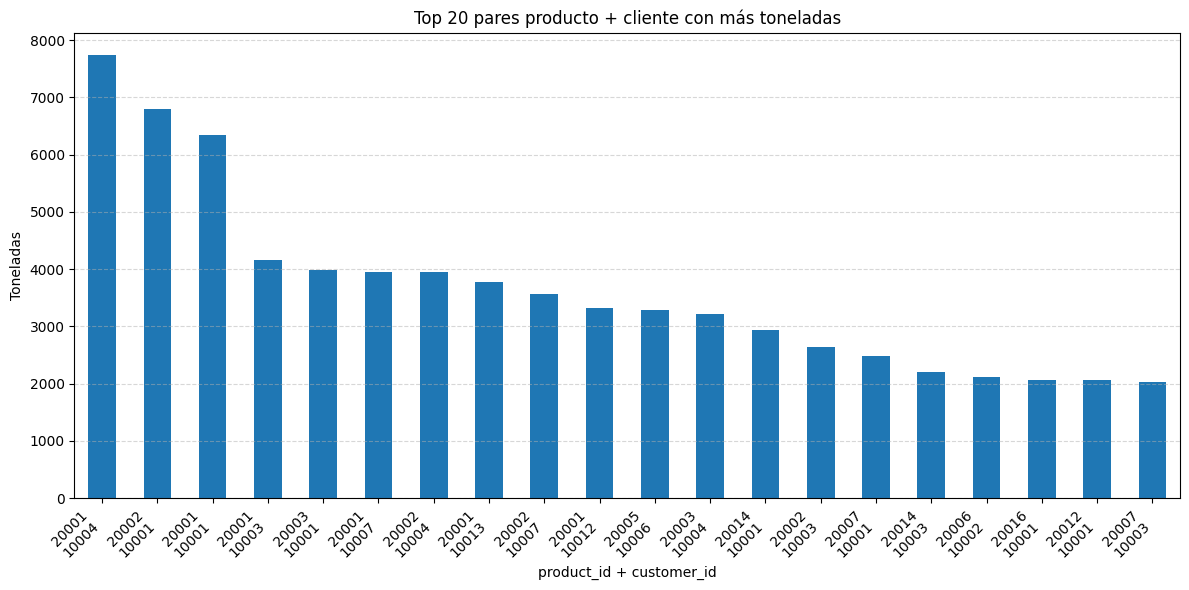

🖼️ Gráfico guardado como 'top_20_pares_toneladas.png'


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1. Cargar CSV ===
df = pd.read_csv("dataset_base_features.csv", parse_dates=["periodo"])

# === 2. Asegurar tipo numérico robusto
df["tn"] = df["tn"].astype("float32")

# === 3. Verificación de datos
print("🧪 Verificando datos:")
print(df["tn"].describe())
print("¿Hay inf?", np.isinf(df["tn"]).any())
print("¿Hay NaN?", df["tn"].isna().sum())

# === 4. Agrupar y sumar por par (producto + cliente)
suma_por_par = df.groupby(["product_id", "customer_id"])["tn"].sum()

# === 5. Filtrar pares que superan 1 tn
pares_validos = suma_por_par[suma_por_par > 1]

# === 6. Filtrar el DataFrame original
df_filtrado = df.set_index(["product_id", "customer_id"]).loc[pares_validos.index].reset_index()

# === 7. Sumas globales
tn_filtradas = df_filtrado["tn"].sum()
tn_total = df["tn"].sum()
porcentaje = (tn_filtradas / tn_total) * 100

# === 8. Resultados por consola
print(f"✅ Toneladas de pares con más de 1 tn: {tn_filtradas:.2f}")
print(f"📦 Total de toneladas: {tn_total:.2f}")
print(f"📊 Representan el {porcentaje:.2f}% del total")

# === 9. Exportar CSV
#df_filtrado.to_csv("pares_mayor_1tn.csv", index=False)
#print("📝 Exportado como 'pares_mayor_1tn.csv'")

# === 10. Top 20 pares con más tn
top_20 = pares_validos.sort_values(ascending=False).head(20)
top_20.index = [f"{prod}\n{cli}" for prod, cli in top_20.index]  # Etiqueta combinada

# === 11. Gráfico
plt.figure(figsize=(12, 6))
top_20.plot(kind="bar")
plt.title("Top 20 pares producto + cliente con más toneladas")
plt.ylabel("Toneladas")
plt.xlabel("product_id + customer_id")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.savefig("top_20_pares_toneladas.png")
plt.show()

print("🖼️ Gráfico guardado como 'top_20_pares_toneladas.png'")


In [6]:
suma_total_tn = df["tn"].sum()
print(f"🔢 Suma total de tn: {suma_total_tn:.2f}")


🔢 Suma total de tn: 1122602.50


In [7]:

df["periodo"] = pd.to_datetime(df["periodo"])
# === 2. Asegurar tipo numérico en tn ===
df["tn"] = pd.to_numeric(df["tn"], errors="coerce").fillna(0)

# === 3. Agrupar por customer_id y product_id ===
df_agrupado = df.groupby(["customer_id", "product_id"], as_index=False)["tn"].sum()

# === 4. Filtrar pares que suman menos de 1 tn ===
df_filtrado = df_agrupado[df_agrupado["tn"] < 1]
#df_filtrado = df_agrupado[(df_agrupado["tn"] > 1) & (df_agrupado["tn"] < 2)]

# === 5. Métricas generales ===
total_tn = df["tn"].sum()
filtrado_tn = df_filtrado["tn"].sum()
porcentaje_tn = (filtrado_tn / total_tn) * 100

cantidad_pares = df_filtrado.shape[0]
total_pares = df_agrupado.shape[0]
porcentaje_pares = (cantidad_pares / total_pares) * 100

# === 6. Resultados ===
print("📊 Análisis de pares customer_id + product_id con menos de 1 tn:")
print(f"🔢 Total de TN en el dataset: {total_tn:,.2f}")
print(f"🧮 TN de pares con <1 TN: {filtrado_tn:,.2f}")
print(f"📉 Representan el {porcentaje_tn:.2f}% del total de TN")
print(f"👥 Son {cantidad_pares} pares únicos (de {total_pares}) → {porcentaje_pares:.2f}% del total de pares")

# (opcional) Guardar resultado filtrado si querés inspeccionarlo
# df_filtrado.to_csv("pares_menos_1tn.csv", index=False)


📊 Análisis de pares customer_id + product_id con menos de 1 tn:
🔢 Total de TN en el dataset: 1,122,602.50
🧮 TN de pares con <1 TN: 34,469.49
📉 Representan el 3.07% del total de TN
👥 Son 206989 pares únicos (de 262805) → 78.76% del total de pares


In [8]:
df["periodo"] = pd.to_datetime(df["periodo"])
# === 2. Asegurar que tn es numérico ===
df["tn"] = pd.to_numeric(df["tn"], errors="coerce").fillna(0)

# === 3. Agrupar por customer_id y product_id, sumando tn ===
df_agrupado = df.groupby(["customer_id", "product_id"], as_index=False)["tn"].sum()

# === 4. Ordenar por tn descendente y tomar los 20 pares con mayor tn ===
top20 = df_agrupado.sort_values("tn", ascending=False).head(10000)

# === 5. Calcular totales y porcentaje ===
tn_total = df_agrupado["tn"].sum()
tn_top20 = top20["tn"].sum()
porcentaje = (tn_top20 / tn_total) * 100

# === 6. Mostrar resultados ===
print(f"📦 Toneladas totales en el dataset: {tn_total:,.2f}")
print(f"🏆 Toneladas de los 20 pares top: {tn_top20:,.2f}")
print(f"📊 Representan el {porcentaje:.2f}% del total")




📦 Toneladas totales en el dataset: 1,122,603.38
🏆 Toneladas de los 20 pares top: 904,305.12
📊 Representan el 80.55% del total


In [10]:
import pandas as pd

# === 1. Cargar dataset ===
df["periodo"] = pd.to_datetime(df["periodo"])
df["customer_id"] = df["customer_id"].astype(str)
df["product_id"] = df["product_id"].astype(str)
df["tn"] = pd.to_numeric(df["tn"], errors="coerce").fillna(0)

# === 2. Agrupar por par customer-product y sumar tn ===
df_agrupado = (
    df.groupby(["customer_id", "product_id"], as_index=False)["tn"]
    .sum()
    .rename(columns={"tn": "tn_total"})
)

# === 3. Ordenar por tn_total descendente y calcular acumulado y porcentaje ===
df_agrupado = df_agrupado.sort_values("tn_total", ascending=False)
df_agrupado["acumulado"] = df_agrupado["tn_total"].cumsum()
total_tn = df_agrupado["tn_total"].sum()
df_agrupado["porcentaje"] = 100 * df_agrupado["acumulado"] / total_tn

# === 4. Filtrar el 90% más representativo ===
top90 = df_agrupado[df_agrupado["porcentaje"] <= 90].copy()

# === 5. Mostrar resumen ===
print(f"Total de toneladas: {total_tn:,.2f}")
print(f"El 90% representa: {top90['tn_total'].sum():,.2f} tn")
print(f"Incluye {len(top90)} pares customer-product")

# === 6. Exportar resultado si querés ===
#top90.to_csv("pares_top90.csv", index=False)
#print("Archivo 'pares_top90.csv' exportado.")


Total de toneladas: 1,122,603.50
El 90% representa: 1,010,340.44 tn
Incluye 22084 pares customer-product


In [28]:
print(df.columns.tolist())


['customer_id', 'product_id', 'periodo', 'plan_precios_cuidados', 'cust_request_qty', 'cust_request_tn', 'tn', 'stock_final', 'cat1', 'cat2', 'cat3', 'brand', 'sku_size', 'tn_norm', 'cust_request_tn_norm', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26', 'lag_27', 'lag_28', 'lag_29', 'lag_30', 'lag_31', 'lag_32', 'lag_33', 'lag_34', 'lag_35', 'lag_36', 'delta_lag_1', 'delta_lag_2', 'delta_lag_3', 'delta_lag_4', 'delta_lag_5', 'delta_lag_6', 'delta_lag_7', 'delta_lag_8', 'delta_lag_9', 'delta_lag_10', 'delta_lag_11', 'delta_lag_12', 'delta_lag_13', 'delta_lag_14', 'delta_lag_15', 'delta_lag_16', 'delta_lag_17', 'delta_lag_18', 'delta_lag_19', 'delta_lag_20', 'delta_lag_21', 'delta_lag_22', 'delta_lag_23', 'delta_lag_24', 'delta_lag_25', 'delta_lag_26', 'delta_lag_27', 'delta_lag_28', 'del

In [ ]:
df["periodo"] = pd.to_datetime(df["periodo"])

df["customer_id"] = df["customer_id"].astype(str)
df["product_id"] = df["product_id"].astype(str)
df["tn"] = pd.to_numeric(df["tn"], errors="coerce").fillna(0)

# === 2. Sumar tn por par customer-product ===
sumas = (
    df.groupby(["customer_id", "product_id"], as_index=False)["tn"]
    .sum()
    .rename(columns={"tn": "tn_total"})
)

# === 3. Ordenar y calcular acumulado y porcentaje ===
sumas = sumas.sort_values("tn_total", ascending=False)
sumas["acumulado"] = sumas["tn_total"].cumsum()
total_tn = sumas["tn_total"].sum()
sumas["porcentaje"] = 100 * sumas["acumulado"] / total_tn

# === 4. Filtrar top 90% por tn acumulado ===
top90 = sumas[sumas["porcentaje"] <= 90].copy()

# === 5. Filtrar el dataset original por esos pares ===
pares_top = top90[["customer_id", "product_id"]]
df_top90_series = df.merge(pares_top, on=["customer_id", "product_id"])

# === 6. Verificar que cada serie tenga 36 períodos (opcional) ===
conteo_series = (
    df_top90_series.groupby(["customer_id", "product_id"])["periodo"]
    .count()
    .reset_index(name="cantidad_periodos")
)
series_completas = conteo_series[conteo_series["cantidad_periodos"] == 36]

# === 7. Filtrar solo las series completas ===
df_top90_series_completas = df_top90_series.merge(series_completas, on=["customer_id", "product_id"])

# === 8. Resultados ===
print(f"Toneladas totales: {total_tn:,.2f}")
print(f"90% representa: {top90['tn_total'].sum():,.2f} tn")
print(f"Series completas dentro del 90%: {len(series_completas)} pares")
print(f"Total de registros: {len(df_top90_series_completas)}")

# === 9. Exportar (opcional) ===
#df_top90_series_completas.to_csv("series_completas_top90.csv", index=False)
#print("Archivo 'series_completas_top90.csv' exportado.")


Toneladas totales: 1,122,603.50
90% representa: 1,010,340.44 tn
Series completas dentro del 90%: 22084 pares
Total de registros: 795024
Archivo 'series_completas_top90.csv' exportado.


In [ ]:
import pandas as pd

# === 1. Cargar dataset completo ===
df["periodo"] = pd.to_datetime(df["periodo"])

df["customer_id"] = df["customer_id"].astype(str)
df["product_id"] = df["product_id"].astype(str)

# === 2. Cargar los pares top 90 ===
pares_top = pd.read_csv("pares_top90.csv", dtype={"customer_id": str, "product_id": str})

# === 3. Filtrar dataset por esos pares ===
df_filtrado = df.merge(pares_top, on=["customer_id", "product_id"])

# === 4. Verificar cantidad de períodos por serie ===
conteo_series = (
    df_filtrado.groupby(["customer_id", "product_id"])["periodo"]
    .nunique()
    .reset_index(name="periodos_distintos")
)

# === 5. Quedarse solo con series completas de 36 períodos ===
series_completas = conteo_series[conteo_series["periodos_distintos"] == 36]

# === 6. Filtrar nuevamente ===
df_series_completas = df_filtrado.merge(series_completas[["customer_id", "product_id"]], on=["customer_id", "product_id"])

# === 7. Exportar ===
#df_series_completas.to_csv("dataset_top90_series_completas.csv", index=False)
print("Exportado como 'dataset_top90_series_completas.csv'")
print(f"Series completas encontradas: {len(series_completas)}")


✅ Exportado como 'dataset_top90_series_completas.csv'
🧮 Series completas encontradas: 22084


In [ ]:
import pandas as pd

# Cargar archivo top 90% (solo columnas necesarias)
top90 = pd.read_csv("dataset_top90_series_completas.csv", usecols=["customer_id", "product_id"])
top90["customer_id"] = top90["customer_id"].astype(str)
top90["product_id"] = top90["product_id"].astype(str)

# Asegurar consistencia en df actual
df["customer_id"] = df["customer_id"].astype(str)
df["product_id"] = df["product_id"].astype(str)

# Hacer el merge inverso para encontrar pares que NO están en top90
df_restante = df.merge(
    top90.drop_duplicates(),
    on=["customer_id", "product_id"],
    how="left",
    indicator=True
)

# Filtrar los pares no presentes en top90
df_10restante = df_restante[df_restante["_merge"] == "left_only"].drop(columns=["_merge"])

# Exportar
#df_10restante.to_csv("dataset_restante_10porc.csv", index=False)
print(f"✅ Exportado como 'dataset_restante_10porc.csv' con {len(df_10restante)} registros")


In [32]:
# Asegurarse de que la columna 'periodo' sea datetime
df["periodo"] = pd.to_datetime(df["periodo"])

# Agrupar por período y sumar tn
tn_por_periodo = df.groupby("periodo", as_index=False)["tn"].sum()

# Mostrar resultado
print(tn_por_periodo)

# (Opcional) Exportar a CSV
#tn_por_periodo.to_csv("tn_totales_por_periodo.csv", index=False)


      periodo            tn
0  2017-01-01  27198.982422
1  2017-02-01  27304.189453
2  2017-03-01  36656.746094
3  2017-04-01  31076.552734
4  2017-05-01  35808.351562
5  2017-06-01  35277.882812
6  2017-07-01  29462.949219
7  2017-08-01  32342.337891
8  2017-09-01  39281.855469
9  2017-10-01  40826.546875
10 2017-11-01  35676.878906
11 2017-12-01  29759.669922
12 2018-01-01  24856.681641
13 2018-02-01  28185.203125
14 2018-03-01  40064.324219
15 2018-04-01  30734.474609
16 2018-05-01  34238.527344
17 2018-06-01  30054.482422
18 2018-07-01  28305.347656
19 2018-08-01  31832.457031
20 2018-09-01  28706.064453
21 2018-10-01  32096.224609
22 2018-11-01  30170.714844
23 2018-12-01  24028.326172
24 2019-01-01  26406.150391
25 2019-02-01  27199.656250
26 2019-03-01  31955.927734
27 2019-04-01  30922.636719
28 2019-05-01  30984.425781
29 2019-06-01  30775.734375
30 2019-07-01  31546.447266
31 2019-08-01  23967.312500
32 2019-09-01  32704.441406
33 2019-10-01  34905.464844
34 2019-11-01  32146

In [4]:
# Asegurar tipos
df["customer_id"] = df["customer_id"].astype(str)
df["product_id"] = df["product_id"].astype(str)
df["tn"] = pd.to_numeric(df["tn"], errors="coerce")

# Agrupar y sumar sin rellenar NaN
sumas = (
    df.groupby(["customer_id", "product_id"], as_index=False)["tn"]
    .sum(min_count=1)  # mantiene NaN si los valores originales lo son
    .rename(columns={"tn": "tn_total"})
)
sumas = sumas.dropna(subset=["tn_total"])

# Ordenar y calcular porcentaje acumulado
sumas = sumas.sort_values("tn_total", ascending=False)
sumas["acumulado"] = sumas["tn_total"].cumsum()
total_tn = sumas["tn_total"].sum()
sumas["porcentaje"] = 100 * sumas["acumulado"] / total_tn

# Cortes 50 / 30 / 20
grupo_50 = sumas[sumas["porcentaje"] <= 50]
grupo_30 = sumas[(sumas["porcentaje"] > 50) & (sumas["porcentaje"] <= 80)]
grupo_20 = sumas[sumas["porcentaje"] > 80]

# Filtrar df original
df_50 = df.merge(grupo_50[["customer_id", "product_id"]], on=["customer_id", "product_id"])
df_30 = df.merge(grupo_30[["customer_id", "product_id"]], on=["customer_id", "product_id"])
df_20 = df.merge(grupo_20[["customer_id", "product_id"]], on=["customer_id", "product_id"])

# Exportar
df_50.to_csv("top50nuevo.csv", index=False)
df_30.to_csv("top30nuevo.csv", index=False)
df_20.to_csv("top20nuevo.csv", index=False)

print("Archivos exportados sin rellenar NaN")


Archivos exportados sin rellenar NaN
